In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Polygon

# --- Function for finding intersection ---
def find_boundary_intersection(start_point, direction, boundary_x, boundary_y, gap=0.0):
    path = Path(np.column_stack((boundary_x, boundary_y)))
    step = 0.001
    distance = 0
    max_distance = 10
    while distance < max_distance:
        test_point = [
            start_point[0] + distance * direction[0],
            start_point[1] + distance * direction[1]
        ]
        if not path.contains_point(test_point):
            return [
                start_point[0] + (distance - gap) * direction[0],
                start_point[1] + (distance - gap) * direction[1]
            ]
        distance += step
    return [
        start_point[0] + (max_distance - gap) * direction[0],
        start_point[1] + (max_distance - gap) * direction[1]
    ]

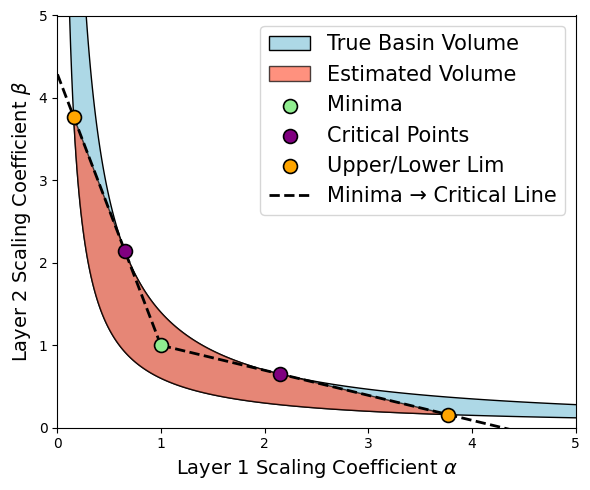

In [4]:
# --- Parameters ---
a = 0.4  # adjust to change "thickness" of region

# Original boundary (for "True Basin Volume")
x_vals_top_orig = np.linspace(0.01, 10, 1000)
x_vals_bottom_orig = np.linspace(10, 0.01, 1000)
y_top_orig = (1 + a) / x_vals_top_orig
y_bottom_orig = (1 - a) / x_vals_bottom_orig
boundary_x = np.concatenate([x_vals_top_orig, x_vals_bottom_orig])
boundary_y = np.concatenate([y_top_orig, y_bottom_orig])

center = [1.0, 1/1.0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5), sharex=True)

# --- Construct polygon manually (replacing estimated shape) ---
x_c_left = center[0]*(1 + a) * (1 - np.sqrt(a / (1 + a)))
x_c_right = center[0]*(1 + a) * (1 + np.sqrt(a / (1 + a)))
x_min = x_c_left * (1 - np.sqrt(2 * a / (1 + a)))
x_max = x_c_right * (1 + np.sqrt(2 * a / (1 + a)))

x_vals_top = np.linspace(x_c_left, x_c_right, 500)
x_vals_bottom = np.linspace(x_max, x_min, 500)
y_top = (1 + a) / x_vals_top
y_bottom = (1 - a) / x_vals_bottom

polygon_x = []
polygon_y = []

# Line from x_min to x_c_left
polygon_x.extend([x_min, x_c_left])
polygon_y.extend([(1 - a)/x_min, (1 + a)/x_c_left])

# Upper boundary
polygon_x.extend(x_vals_top)
polygon_y.extend(y_top)

# Line from x_c_right to x_max
polygon_x.extend([x_c_right, x_max])
polygon_y.extend([(1 + a)/x_c_right, (1 - a)/x_max])

# Lower boundary
polygon_x.extend(x_vals_bottom)
polygon_y.extend(y_bottom)

# --- Plot the original "True Basin Volume" ---
true_polygon = Polygon(
    np.column_stack((boundary_x, boundary_y)),
    closed=True,
    facecolor='lightblue',
    edgecolor='k',
    label="True Basin Volume"
)
ax.add_patch(true_polygon)

# --- Plot the manually constructed estimated shape ---
estimated_polygon = Polygon(
    np.column_stack((polygon_x, polygon_y)),
    closed=True,
    facecolor='tomato',
    edgecolor='black',
    alpha=0.7,
    label="Estimated Volume"
)
ax.add_patch(estimated_polygon)

# Plot the center point
ax.scatter(center[0], center[1],
           s=100,                  # size
           facecolor="lightgreen", # muted green fill
           edgecolor="black",     # black border
           linewidths=1.2,
           zorder=5,
           label="Minima")

ax.scatter((x_c_left, x_c_right), ((1 + a)/x_c_left, (1 + a)/x_c_right),
           s=100,                  # size
           facecolor="purple", # muted green fill
           edgecolor="black",     # black border
           linewidths=1.2,
           zorder=5,
           label="Critical Points")

ax.scatter((x_min, x_max), ((1 - a)/x_min, (1 - a)/x_max),
           s=100,                  # size
           facecolor="orange", # muted green fill
           edgecolor="black",     # black border
           linewidths=1.2,
           zorder=5,
           label="Upper/Lower Lim")

# --- Add line from minima to x_c_left upper point and extend indefinitely ---
line_start = center
line_point = np.array([x_c_left, (1 + a)/x_c_left])
direction = line_point - line_start

# Scale to extend far beyond the plot
scale = 10  # adjust this to make line “indefinite”
line_end = line_start + direction * scale
ax.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]],
        color='black', linestyle='--', linewidth=2, label="Minima → Critical Line")

# Line from minima to right critical point, extended
line_point_right = np.array([x_c_right, (1 + a)/x_c_right])
direction_right = line_point_right - center
line_end_right = center + direction_right * 10  # same scale factor
ax.plot([center[0], line_end_right[0]], [center[1], line_end_right[1]],
        color='black', linestyle='--', linewidth=2)#, label="Minima → Right Critical")

# Formatting
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.legend(fontsize=15, loc="upper right")

# Add axis labels (only to outer axes so they are not repeated)
ax.set_xlabel(r"Layer 1 Scaling Coefficient $\alpha$", fontsize=14)
ax.set_ylabel(r"Layer 2 Scaling Coefficient $\beta$", fontsize=14)

plt.tight_layout()
plt.savefig("figs/appendix_diagram.png")
plt.show()
